In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor # 랜덤포레스트

# 데이터 불러오기

In [2]:
train = pd.read_csv('C:/Users/jyuma/Desktop/DNA 데분스터디/따릉이/따릉이/train.csv')
test = pd.read_csv('C:/Users/jyuma/Desktop/DNA 데분스터디/따릉이/따릉이/test.csv')

In [3]:
submission = pd.read_csv('C:/Users/jyuma/Desktop/DNA 데분스터디/따릉이/따릉이/submission.csv')

# 탐색적 자료분석
Exploratory Data Analysis(EDA)

참고 : https://www.youtube.com/watch?v=WreGAJxukpA

In [4]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [5]:
test.head() # train과 달리 count가 없음 -> 이유 : 예측해야하기 때문

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [6]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [7]:
print(train.shape)
print(test.shape)
print(submission.shape)

(1459, 11)
(715, 10)
(715, 2)


In [8]:
# 결측값 확인 -> 오류 줄이기 위해 결측값을 채워 넣어주어야 함
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
id                        1459 non-null int64
hour                      1459 non-null int64
hour_bef_temperature      1457 non-null float64
hour_bef_precipitation    1457 non-null float64
hour_bef_windspeed        1450 non-null float64
hour_bef_humidity         1457 non-null float64
hour_bef_visibility       1457 non-null float64
hour_bef_ozone            1383 non-null float64
hour_bef_pm10             1369 non-null float64
hour_bef_pm2.5            1342 non-null float64
count                     1459 non-null float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
id                        715 non-null int64
hour                      715 non-null int64
hour_bef_temperature      714 non-null float64
hour_bef_precipitation    714 non-null float64
hour_bef_windspeed        714 non-null float64
hour_bef_humidity         714 non-null float64
hour_bef_visibility       714 non-null float64
hour_bef_ozone            680 non-null float64
hour_bef_pm10             678 non-null float64
hour_bef_pm2.5            679 non-null float64
dtypes: float64(8), int64(2)
memory usage: 55.9 KB


In [10]:
# 기술통계량
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [11]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [12]:
# 시간별 따릉이 대여량 추이 -> groupby 사용해 시간을 그룹지어줌

In [13]:
train.groupby('hour').mean()['count']

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

In [14]:
# 시각화(plot)
train.groupby('hour').mean()['count'].plot()

In [15]:
import matplotlib.pyplot as plt

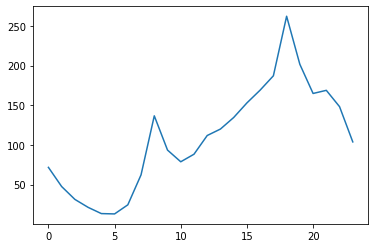

In [16]:
plt.plot(train.groupby('hour').mean()['count'])

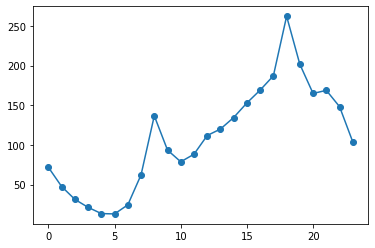

In [17]:
plt.plot(train.groupby('hour').mean()['count'], 'o-')

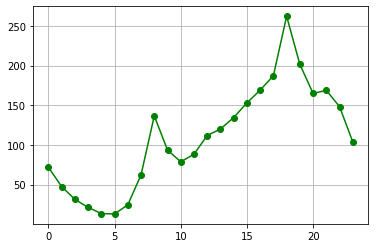

In [18]:
plt.plot(train.groupby('hour').mean()['count'], 'go-')
plt.grid()

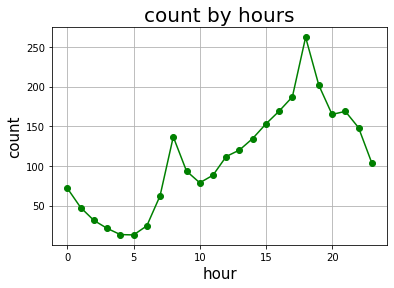

In [19]:
plt.plot(train.groupby('hour').mean()['count'], 'go-')
plt.grid()
plt.title("count by hours", fontsize = 20)
plt.xlabel('hour', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.savefig('picture.png') # 사진 저장

Text(18, 130, 'leave work')

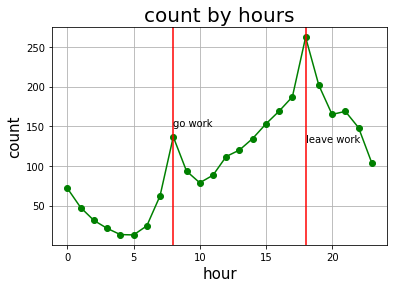

In [20]:
plt.plot(train.groupby('hour').mean()['count'], 'go-')
plt.grid()
plt.title("count by hours", fontsize = 20)
plt.xlabel('hour', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.axvline(8, color = 'r')
plt.axvline(18, color = 'r')

plt.text(8, 150, 'go work', fontsize = 10)
plt.text(18, 130, 'leave work', fontsize = 10)

In [21]:
import seaborn as sns

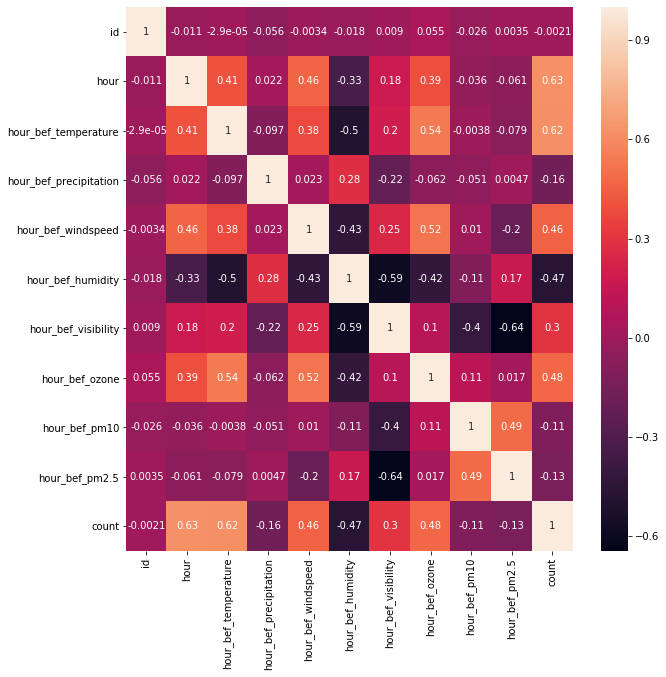

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot = True) # annot : 정확한 수치값

# 데이터 전처리
hour, hour_bef_temperature, hour_bef_windspeed 데이터만 사용

참고 : https://www.youtube.com/watch?v=7IbTi1QicHU

In [23]:
# 결측치 여부 확인
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [24]:
# 결측치 위치 확인
train[train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [25]:
# 시간에 따른 온도로 결측치 채우기

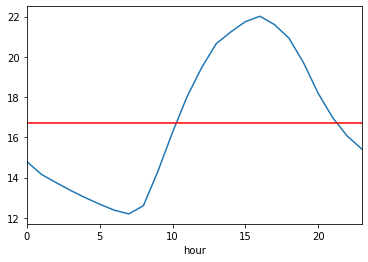

In [26]:
train.groupby('hour').mean()['hour_bef_temperature'].plot()
plt.axhline(train.groupby('hour').mean()['hour_bef_temperature'].mean(), color = 'r')

In [27]:
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [28]:
train['hour_bef_temperature'].fillna({934:14.788136, 1035:20.926667}, inplace = True) # inplace = True : 값 저장

In [29]:
# 값 저장 확인
train.loc[[934, 1035], :]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [30]:
# 반복

In [31]:
train[train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


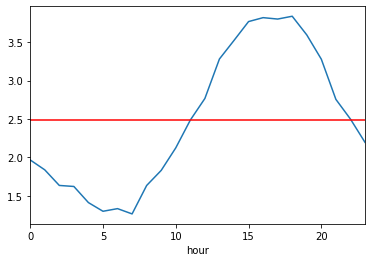

In [32]:
train.groupby('hour').mean()['hour_bef_windspeed'].plot()
plt.axhline(train.groupby('hour').mean()['hour_bef_windspeed'].mean(), color = 'r')

In [33]:
train.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [34]:
train['hour_bef_windspeed'].fillna({18:3.281356, 244:1.836667, 260:1.620000, 376:1.965517, 780:3.278333,
                                   934:1.965517, 1035:3.838333, 1138:2.766667, 1229:1.633333}, inplace = True)

In [35]:
# 결측치 없음
train[train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [36]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          0
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [37]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [38]:
# test데이터 결측치 채워넣기

In [39]:
test[test['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
train.groupby('hour').mean()['hour_bef_temperature'] # test데이터도 train데이터의 평균 데이터로 채워 넣어야 함

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [41]:
test['hour_bef_temperature'].fillna({653:19.704918}, inplace = True)

In [42]:
test[test['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,19.704918,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
train.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [44]:
test['hour_bef_windspeed'].fillna({653:3.595082}, inplace = True)

In [45]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     1
hour_bef_windspeed         0
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

# 변수 선택 및 모델 구축
Feature Engineering & Initial Modeling

참고 : https://www.youtube.com/watch?v=FrzmkRKDyjA

In [46]:
features =['hour', 'hour_bef_temperature', 'hour_bef_windspeed']

X_train = train[features]
Y_train = train['count']

X_test = test[features]

In [47]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(1459, 3)
(1459,)
(715, 3)


In [48]:
model = RandomForestRegressor()
model100 = RandomForestRegressor(n_estimators=100, random_state=0)
model100_5 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
model200 = RandomForestRegressor(n_estimators=200, random_state=0)

In [49]:
model.fit(X_train, Y_train)
model100.fit(X_train, Y_train)
model100_5.fit(X_train, Y_train)
model200.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [50]:
Ypred = model.predict(X_test)
Ypred1 = model100.predict(X_test)
Ypred2 = model100_5.predict(X_test)
Ypred3 = model200.predict(X_test)

In [51]:
submission['count']=Ypred
submission.to_csv('model.csv', index = False)

In [52]:
submission['count']=Ypred1
submission.to_csv('model100.csv', index = False)

In [53]:
submission['count']=Ypred2
submission.to_csv('model100_5.csv', index = False)

In [54]:
submission['count']=Ypred3
submission.to_csv('model200.csv', index = False)

In [55]:
# index = False : 중요!!

# 하이퍼파타미터 튜닝
참고 : https://injo.tistory.com/30

# 회귀모델에 대한 분석

## logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression
modellog = LogisticRegression(max_iter=1000)
modellog.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
Ypredlog = modellog.predict(X_test)

In [58]:
submission['count']=Ypredlog
submission.to_csv('modellog.csv', index = False)

## Decision tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
modeldec = DecisionTreeClassifier()
modeldec.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [60]:
Ypreddec = modeldec.predict(X_test)

In [61]:
submission['count']=Ypreddec
submission.to_csv('modeldec.csv', index = False)

## Support vector machine

In [62]:
from sklearn.svm import SVC
modelsvc = SVC()
modelsvc.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [63]:
Ypredsvc = modelsvc.predict(X_test)

In [64]:
submission['count']=Ypredsvc
submission.to_csv('modelsvc.csv', index = False)

## Gaussian naive bayes

In [65]:
from sklearn.naive_bayes import GaussianNB
modelgnb = GaussianNB()
modelgnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
Ypredgnb = modelgnb.predict(X_test)

In [67]:
submission['count']=Ypredgnb
submission.to_csv('modelgnb.csv', index = False)

## K nearest neighbor

In [68]:
from sklearn.neighbors import KNeighborsClassifier
moedlknn = KNeighborsClassifier()
moedlknn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
Ypredknn = moedlknn.predict(X_test)

In [70]:
submission['count']=Ypredknn
submission.to_csv('modelknn.csv', index = False)

## Random forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
modelrf = RandomForestClassifier()
modelrf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
Ypredrf = modelrf.predict(X_test)

In [73]:
submission['count']=Ypredrf
submission.to_csv('modelrf.csv', index = False)

## Gradient boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb = GradientBoostingClassifier()

In [82]:
# modelgb.fit(X_train, Y_train)

In [85]:
# Ypredgb = modelgb.predict(X_test)

In [86]:
# submission['count']=Ypredgb
# submission.to_csv('modelgb.csv', index = False)

## Neural network

In [75]:
from sklearn.neural_network import MLPClassifier
modelmlp = MLPClassifier(max_iter=1000)
modelmlp.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [76]:
Ypredmlp = modelmlp.predict(X_test)

In [77]:
submission['count']=Ypredmlp
submission.to_csv('modelmlp.csv', index = False)

## 결과(점수)